In [1]:
# Analytical representation of Linear Regression using Movie recommendation dataset


In [2]:
# 1 Create the data frame
data <- data.frame(
  Years_Exp = c(1.1, 1.3, 1.5, 2.0, 2.2, 2.9, 3.0, 3.2, 3.2, 3.7),
  Salary = c(39343.00, 46205.00, 37731.00, 43525.00,
             39891.00, 56642.00, 60150.00, 54445.00, 64445.00, 57189.00))


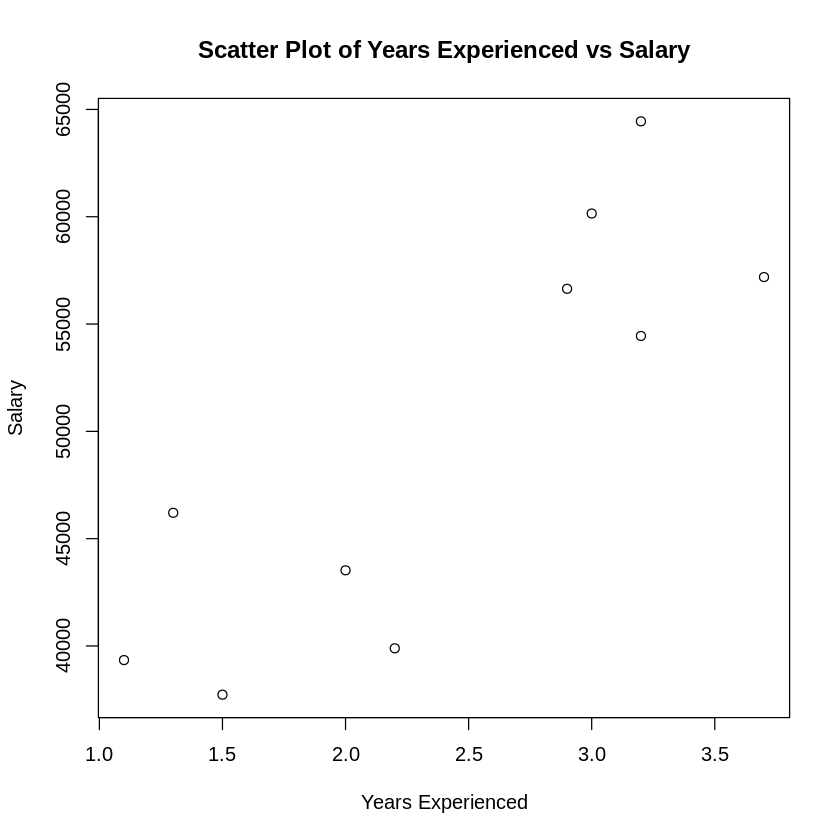

In [3]:
# 2  Create the scatter plot
plot(data$Years_Exp, data$Salary,
     xlab = "Years Experienced",
     ylab = "Salary",
     main = "Scatter Plot of Years Experienced vs Salary")


In [12]:
# 3 implement Simple Linear Regression:
install.packages('caTools') # Install the package
library(caTools) # Load the package
split = sample.split(data$Salary, SplitRatio = 0.7)
trainingset = subset(data, split == TRUE)
testset = subset(data, split == FALSE)

# Fitting Simple Linear Regression to the Training set
lm.r= lm(formula = Salary ~ Years_Exp,
         data = trainingset)
#Summary of the model
summary(lm.r)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Call:
lm(formula = Salary ~ Years_Exp, data = trainingset)

Residuals:
       3        4        5        6        7        9       10 
  464.15    89.08 -6012.54  2101.77  4375.95  6203.33 -7221.74 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)    18760       7986   2.349  0.06563 . 
Years_Exp      12338       2918   4.228  0.00826 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5488 on 5 degrees of freedom
Multiple R-squared:  0.7815,	Adjusted R-squared:  0.7378 
F-statistic: 17.88 on 1 and 5 DF,  p-value: 0.00826


In [1]:
# Install necessary packages if not already installed
if (!require("recommenderlab")) install.packages("recommenderlab", dependencies = TRUE)
if (!require("ggplot2")) install.packages("ggplot2", dependencies = TRUE)

# Load necessary libraries
library(recommenderlab)
library(ggplot2)


Loading required package: recommenderlab

Loading required package: Matrix

Loading required package: arules


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write


Loading required package: proxy


Attaching package: ‘proxy’


The following object is masked from ‘package:Matrix’:

    as.matrix


The following objects are masked from ‘package:stats’:

    as.dist, dist


The following object is masked from ‘package:base’:

    as.matrix


Registered S3 methods overwritten by 'registry':
  method               from 
  print.registry_field proxy
  print.registry_entry proxy

Loading required package: ggplot2



In [2]:
# Load the MovieLens dataset (this dataset is available in the recommenderlab package)
data(MovieLense)

# View the structure of the MovieLense dataset
str(MovieLense)

# Summary statistics to check the distribution of ratings
summary(MovieLense)


Formal class 'realRatingMatrix' [package "recommenderlab"] with 2 slots
  ..@ data     :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. ..@ i       : int [1:99392] 0 1 4 5 9 12 14 15 16 17 ...
  .. .. ..@ p       : int [1:1665] 0 452 583 673 882 968 994 1386 1605 1904 ...
  .. .. ..@ Dim     : int [1:2] 943 1664
  .. .. ..@ Dimnames:List of 2
  .. .. .. ..$ : chr [1:943] "1" "2" "3" "4" ...
  .. .. .. ..$ : chr [1:1664] "Toy Story (1995)" "GoldenEye (1995)" "Four Rooms (1995)" "Get Shorty (1995)" ...
  .. .. ..@ x       : num [1:99392] 5 4 4 4 4 3 1 5 4 5 ...
  .. .. ..@ factors : list()
  ..@ normalize: NULL


          Length            Class             Mode 
               1 realRatingMatrix               S4 

In [3]:
# Convert MovieLense to a data frame for linear regression (example using ratings and genres)
MovieLense_df <- as(MovieLense, "data.frame")

# Example: Check the first few rows of the dataset
head(MovieLense_df)


,user,item,rating
,<chr>,<chr>,<dbl>
1,1,Toy Story (1995),5
453,1,GoldenEye (1995),3
584,1,Four Rooms (1995),4
674,1,Get Shorty (1995),3
883,1,Copycat (1995),3
969,1,Shanghai Triad (Yao a yao yao dao waipo qiao) (1995),5


In [4]:
# Remove any missing values (if there are any)
MovieLense_df <- na.omit(MovieLense_df)

# Convert 'user' and 'item' to factors (for linear regression, they need to be treated as categorical variables)
MovieLense_df$user <- as.factor(MovieLense_df$user)
MovieLense_df$item <- as.factor(MovieLense_df$item)

In [5]:
# If needed, create dummy variables for the 'user' and 'item' columns using model.matrix
model_matrix <- model.matrix(~ user + item - 1, data = MovieLense_df)

# Combine the dummy variables with the 'rating' column for linear regression
model_data <- cbind(MovieLense_df$rating, model_matrix)
colnames(model_data)[1] <- "rating"  # Name the first column as 'rating'

In [6]:
# Fit a linear regression model (predicting 'rating' based on 'user' and 'item' factors)
model <- lm(rating ~ ., data = MovieLense_df)  # Using all other variables as predictors

# View the model summary to inspect coefficients and other statistics
summary(model)


Call:
lm(formula = rating ~ ., data = MovieLense_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9195 -0.5570  0.0709  0.6400  3.9038 

Coefficients:
                                                                                       Estimate
(Intercept)                                                                            2.227930
user10                                                                                 0.303911
user100                                                                               -0.320416
user101                                                                               -0.298565
user102                                                                               -0.855813
user103                                                                               -0.082970
user104                                                                               -0.796451
user105                                                              

In [7]:
# Make predictions (e.g., for the first 5 rows of the dataset)

predictions <- predict(model, newdata = MovieLense_df[1:5, ])

print(predictions)

       1      453      584      674      883 
3.908720 3.307499 3.096860 3.604983 3.320024 


In [8]:
# Evaluate the model (optional: calculate performance metrics such as RMSE, MSE)
actual_ratings <- MovieLense_df$rating[1:5]  # Actual ratings for the first 5 rows
mse <- mean((actual_ratings - predictions)^2)  # Mean Squared Error
rmse <- sqrt(mse)  # Root Mean Squared Error

In [9]:
# Print evaluation results
print(paste("MSE:", mse))
print(paste("RMSE:", rmse))

[1] "MSE: 0.513905776502817"
[1] "RMSE: 0.716872217694909"
